In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sample = pd.read_csv('sample_submission_file.csv')

sample.head()

,indexId,Predicted
0,8,Pithecophaga jeffeyri
1,10,Cacatua haematuropygia
2,25,Pithecophaga jeffeyri
3,32,Anas luzonica
4,42,Cacatua haematuropygia


### Train dataset

In [3]:
train = pd.read_csv('train.csv')

train.head()

,indexId,Scientific Name,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,...,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
0,1,Cacatua haematuropygia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Anas luzonica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,Cacatua haematuropygia,63.090,19.902,2432.0,25.639,117.493,420.0,7.148,25.357,...,178.0,896.0,11.330,26.975,52.334,31.232,53.0,305.0,26.028,23.993
3,8,Pithecophaga jeffeyri,66.983,20.849,2044.0,26.936,112.042,166.0,8.192,25.870,...,71.0,971.0,12.230,28.357,73.092,33.079,15.0,340.0,27.275,25.442
4,10,Cacatua haematuropygia,76.739,21.074,2113.0,26.943,63.116,569.0,9.091,27.528,...,429.0,663.0,11.847,27.757,26.627,32.921,135.0,298.0,27.095,26.139


In [4]:
train.shape

(241, 21)

In [5]:
train.describe()

,indexId,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
count,241.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,403.983402,72.975455,20.538193,2394.561497,26.229412,90.032754,488.021390,8.227160,25.932583,552.288770,287.262032,930.160428,11.331102,27.299283,45.556144,31.869380,84.368984,343.283422,26.134348,25.057273
std,246.484516,7.521183,1.897613,596.510282,1.260560,33.922679,354.271203,1.124171,1.503553,147.754708,158.416902,307.822837,1.561048,1.179064,17.615844,1.123113,50.457985,120.938134,1.315086,1.576948
min,1.000000,53.624000,14.443000,1317.000000,21.490000,30.813000,40.000000,4.733000,20.870000,266.000000,28.000000,384.000000,7.000000,22.796000,13.115000,28.100000,7.000000,145.000000,19.741000,19.741000
25%,190.000000,67.504500,19.695000,1920.500000,25.780000,64.154000,268.000000,7.234500,25.355500,435.500000,156.000000,701.000000,10.179000,26.792000,33.121500,31.078000,39.500000,268.000000,25.736000,24.245500
50%,398.000000,72.574000,21.074000,2368.000000,26.451000,83.302000,370.000000,8.025000,26.267000,567.000000,284.000000,879.000000,11.201000,27.521000,43.894000,32.041000,87.000000,322.000000,26.433000,25.442000
75%,635.000000,77.580500,21.826000,2777.000000,27.115000,112.051000,553.000000,9.292000,26.917000,667.000000,375.500000,1054.000000,12.078000,28.103500,56.633000,32.600000,113.500000,383.500000,27.073000,26.229000
max,826.000000,89.591000,24.100000,4492.000000,27.977000,206.728000,1981.000000,10.346000,28.500000,926.000000,651.000000,2082.000000,16.282000,29.338000,111.389000,34.607000,207.000000,824.000000,27.900000,27.038000


In [6]:
train.describe(exclude='number')

,Scientific Name
count,241
unique,5
top,Pithecophaga jeffeyri
freq,75


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
indexId                                241 non-null int64
Scientific Name                        241 non-null object
Annual Mean Temperature                187 non-null float64
Mean Diurnal Range                     187 non-null float64
Isothermality                          187 non-null float64
Temperature Seasonality                187 non-null float64
Max Temperature of Warmest Month       187 non-null float64
Min Temperature of Coldest Month       187 non-null float64
Temperature Annual Range               187 non-null float64
Mean Temperature of Wettest Quarter    187 non-null float64
Mean Temperature of Driest Quarter     187 non-null float64
Mean Temperature of Warmest Quarter    187 non-null float64
Mean Temperature of Coldest Quarter    187 non-null float64
Annual Precipitation                   187 non-null float64
Precipitation of Wettest Month         187 non-null float6

### Test data to submit

In [8]:
submit = pd.read_csv('test.csv')

In [9]:
submit.head()

,indexId,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
0,23,73.329,22.587,1881,27.669,72.208,482,7.451,27.336,321,257,618,10.162,28.474,33.323,32.749,56,220,27.721,26.693
1,282,72.055,22.202,1691,27.354,82.139,412,7.314,27.696,436,219,565,10.151,28.199,33.959,32.353,50,197,27.464,26.249
2,443,74.532,22.978,1810,27.480,57.516,524,6.815,27.616,318,175,777,9.143,28.238,53.009,32.122,51,322,27.064,26.799
3,231,66.250,20.583,2682,26.628,118.340,743,7.632,26.047,565,289,1224,11.520,27.893,54.224,32.103,91,446,26.082,24.999
4,691,83.428,20.335,1518,26.172,56.731,312,9.809,25.571,442,283,463,11.758,26.921,19.576,32.093,88,168,26.627,25.453


In [10]:
submit.shape

(80, 20)

In [11]:
submit.describe()

,indexId,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,392.637500,73.630913,20.935737,2439.825000,26.463362,86.713388,522.487500,8.083400,26.245250,541.925000,276.262500,969.275000,11.042287,27.505625,47.718525,31.978037,80.56250,356.912500,26.251188,25.350712
std,230.854288,8.220490,1.714631,625.822897,1.133458,34.078338,419.235561,0.969066,1.315126,143.372029,154.951748,322.069887,1.271235,0.981355,17.491963,1.015740,49.99591,127.721036,1.359312,1.535955
min,2.000000,54.120000,14.443000,1093.000000,21.490000,28.452000,41.000000,6.682000,22.155000,246.000000,36.000000,322.000000,8.859000,22.796000,13.261000,28.100000,5.00000,122.000000,19.741000,19.741000
25%,220.000000,68.635750,20.314000,1958.000000,26.117750,62.479500,268.750000,7.275500,25.803750,438.250000,161.750000,764.750000,10.151000,26.960000,35.055250,31.323750,44.00000,288.500000,25.893000,25.203250
50%,381.500000,72.944000,21.234500,2418.000000,26.719000,78.291000,394.500000,7.913000,26.569500,574.500000,250.500000,927.000000,11.014000,27.759000,45.422000,32.099500,75.50000,335.000000,26.589000,25.629000
75%,583.500000,79.524750,22.112000,2790.750000,27.337500,104.894000,574.250000,8.771500,27.045750,644.750000,350.000000,1121.500000,11.847500,28.209000,58.449500,32.564000,105.75000,409.000000,27.175750,26.361250
max,809.000000,89.304000,23.550000,4492.000000,27.731000,189.713000,1981.000000,10.346000,28.233000,811.000000,602.000000,1981.000000,14.138000,28.900000,92.229000,33.833000,183.00000,777.000000,27.721000,27.200000


In [12]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
indexId                                80 non-null int64
Annual Mean Temperature                80 non-null float64
Mean Diurnal Range                     80 non-null float64
Isothermality                          80 non-null int64
Temperature Seasonality                80 non-null float64
Max Temperature of Warmest Month       80 non-null float64
Min Temperature of Coldest Month       80 non-null int64
Temperature Annual Range               80 non-null float64
Mean Temperature of Wettest Quarter    80 non-null float64
Mean Temperature of Driest Quarter     80 non-null int64
Mean Temperature of Warmest Quarter    80 non-null int64
Mean Temperature of Coldest Quarter    80 non-null int64
Annual Precipitation                   80 non-null float64
Precipitation of Wettest Month         80 non-null float64
Precipitation of Driest Month          80 non-null float64
Precipitation Seasonalit

### Pre-processing

In [81]:
# Label Encoding the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train['Scientific Name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

train['y'] = le.transform(train['Scientific Name'])

{'Alcedo argentata': 0, 'Anas luzonica': 1, 'Cacatua haematuropygia': 2, 'Egretta eulophotes': 3, 'Pithecophaga jeffeyri': 4}


In [82]:
train['Scientific Name'].value_counts()

Pithecophaga jeffeyri     75
Cacatua haematuropygia    70
Anas luzonica             50
Egretta eulophotes        23
Alcedo argentata          23
Name: Scientific Name, dtype: int64

In [83]:
train.head()

,indexId,Scientific Name,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,...,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter,y
0,1,Cacatua haematuropygia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,4,Anas luzonica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,7,Cacatua haematuropygia,63.090,19.902,2432.0,25.639,117.493,420.0,7.148,25.357,...,896.0,11.330,26.975,52.334,31.232,53.0,305.0,26.028,23.993,2
3,8,Pithecophaga jeffeyri,66.983,20.849,2044.0,26.936,112.042,166.0,8.192,25.870,...,971.0,12.230,28.357,73.092,33.079,15.0,340.0,27.275,25.442,4
4,10,Cacatua haematuropygia,76.739,21.074,2113.0,26.943,63.116,569.0,9.091,27.528,...,663.0,11.847,27.757,26.627,32.921,135.0,298.0,27.095,26.139,2


In [84]:
# sns.scatterplot(['Annual Mean Temperature'], hue='Scientific Name')

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
#Setting X and y
y = train['y']
X = train.drop(['Scientific Name', 'y', 'indexId'], axis = 1)

# Hold out set of 20%
RAND = 11

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RAND)

### Exploring Relationships

C:\Users\angel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\angel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


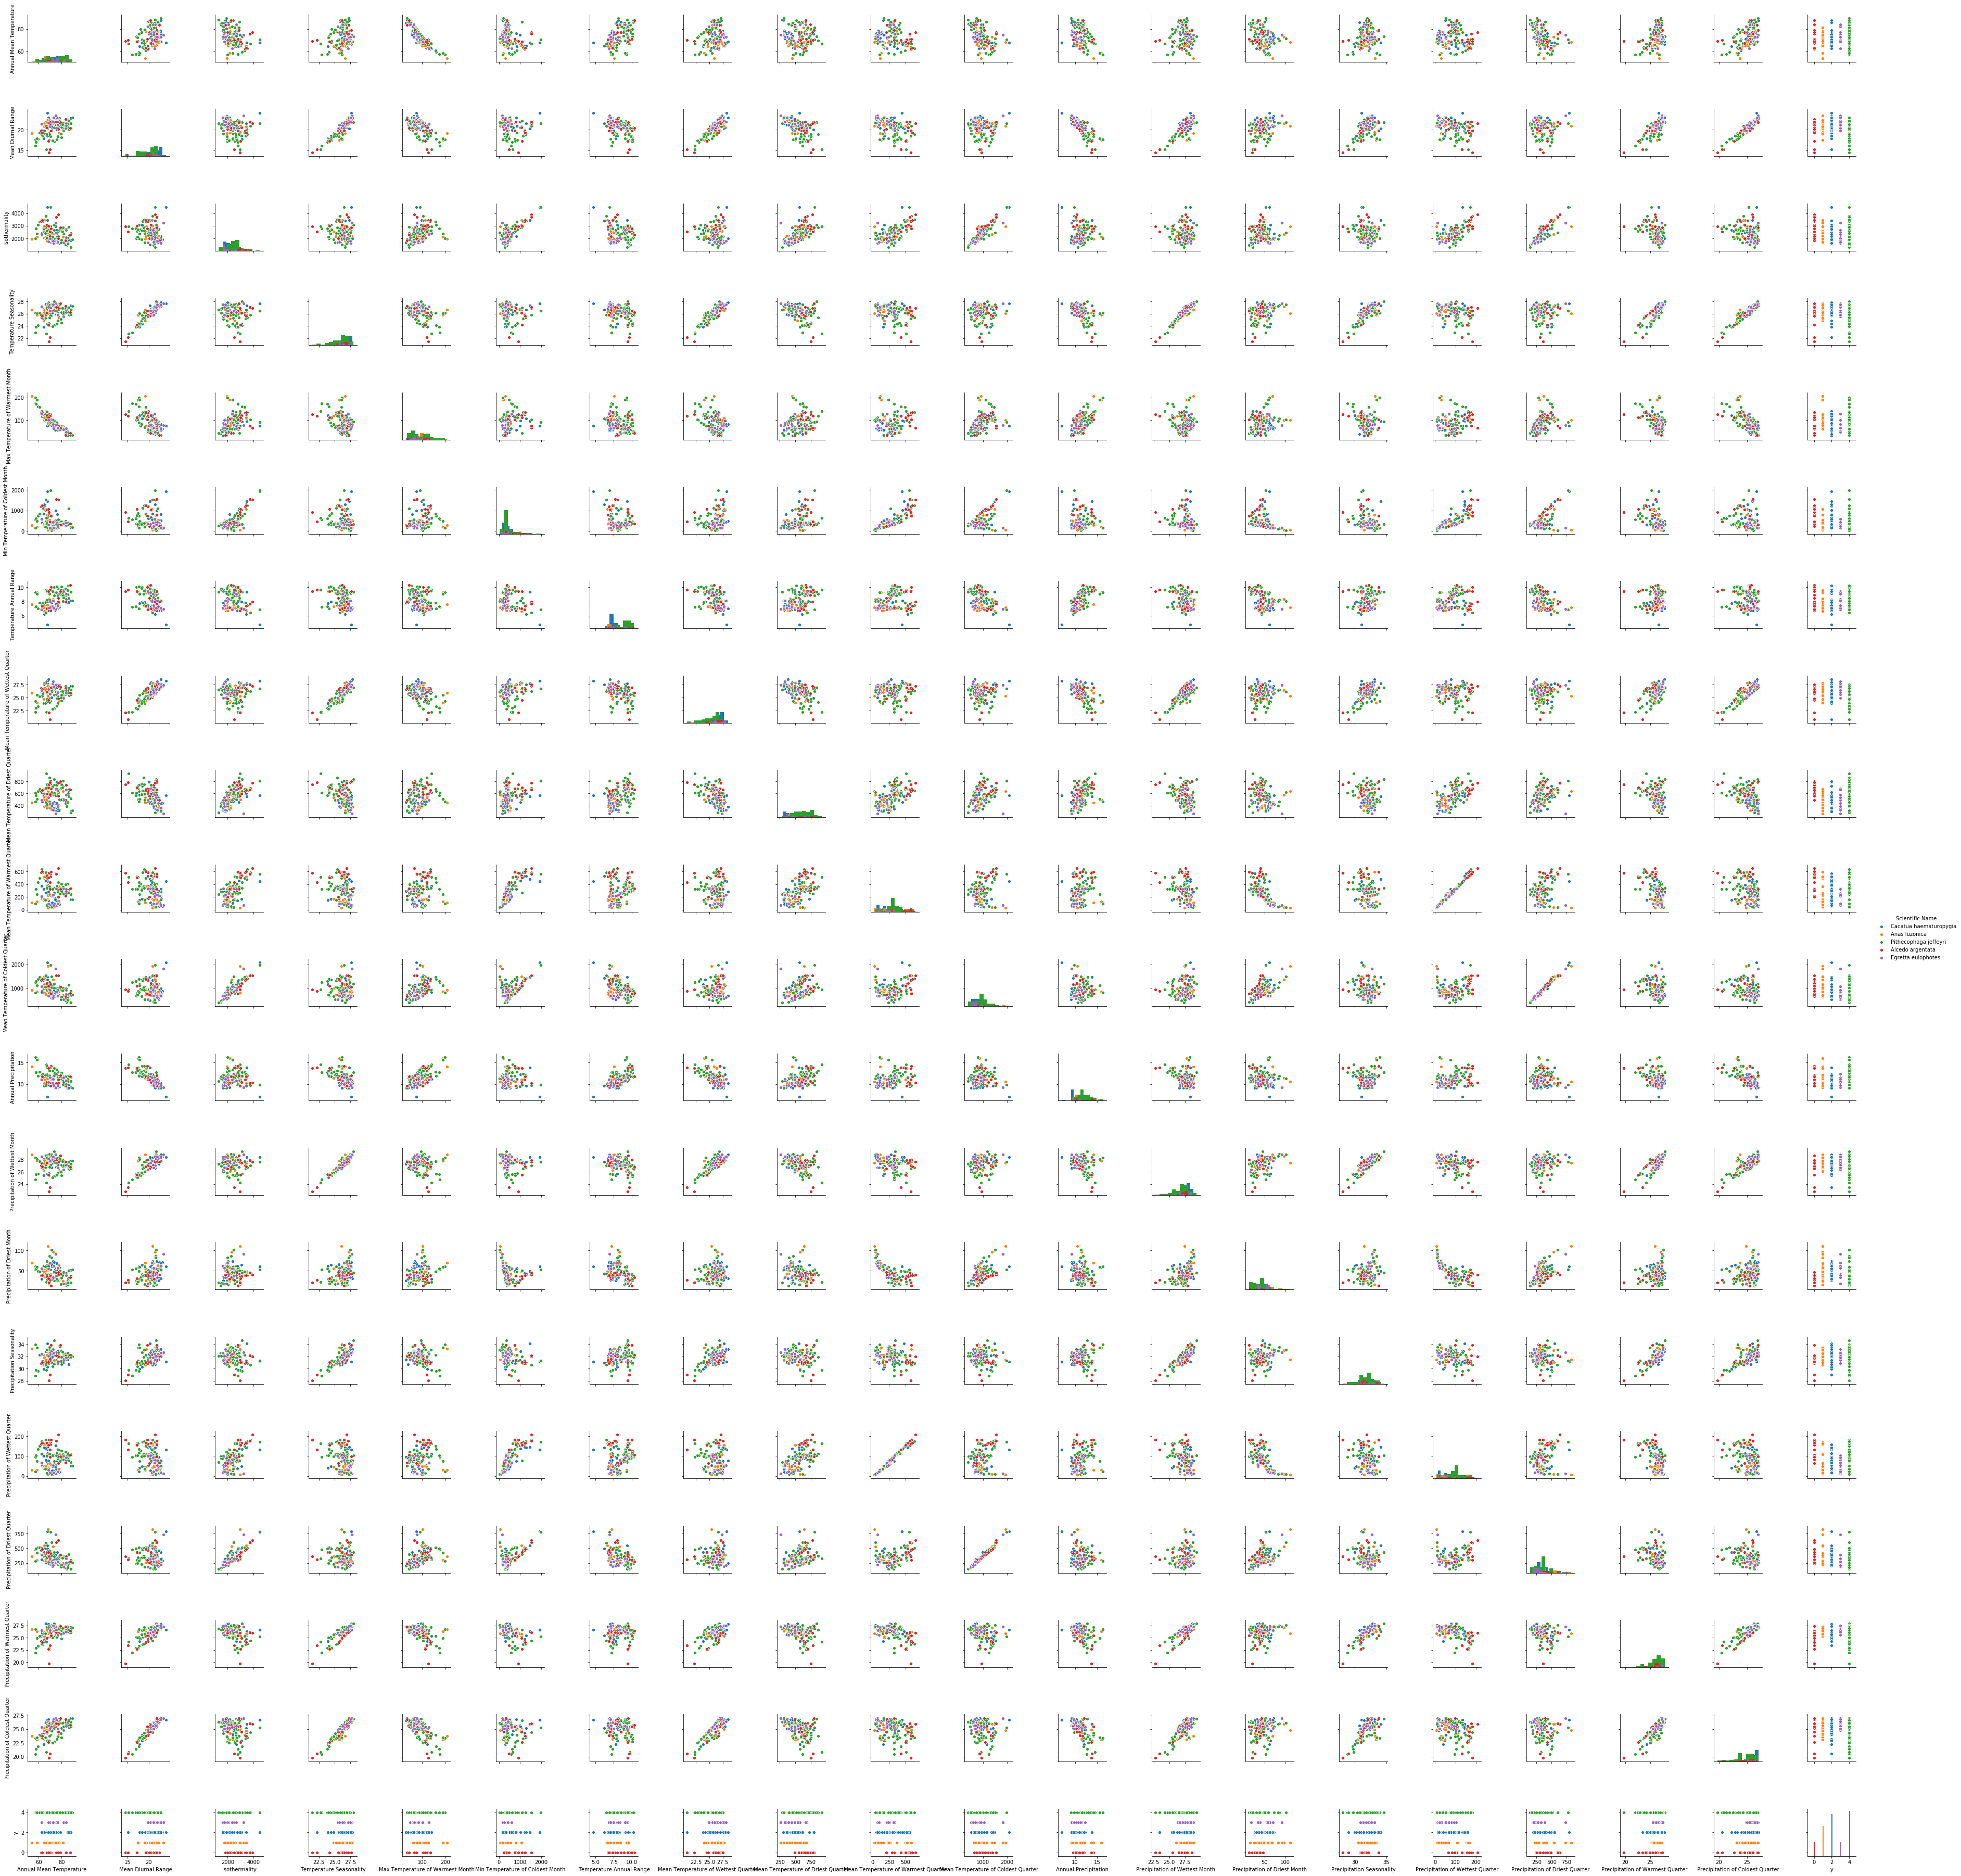

In [77]:
sns.pairplot(train.drop(['indexId'], axis=1), hue='Scientific Name', diag_kind='hist').savefig('pairplot.png')

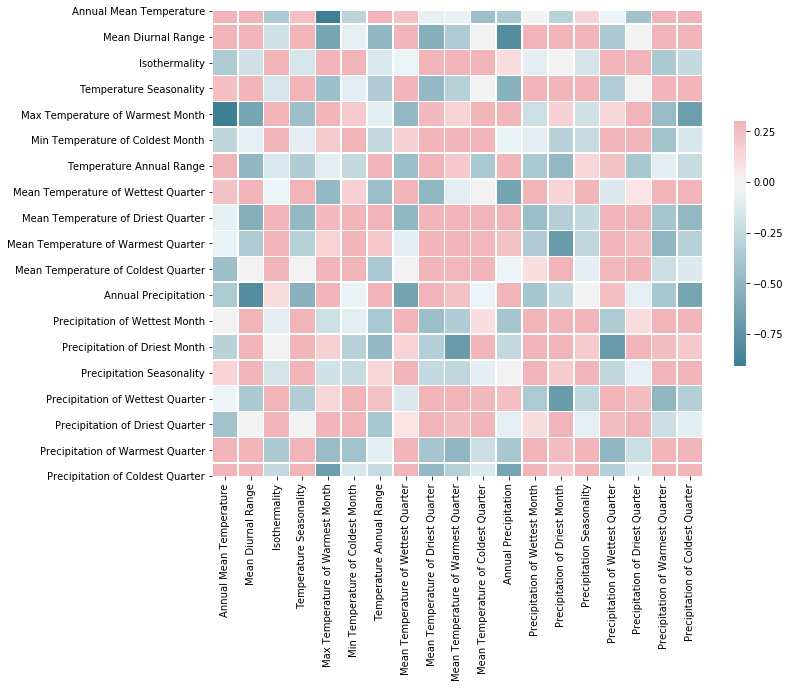

In [21]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

[[-3.9622612  9.351109 ]
 [-2.060986   4.9864326]
 [-1.853833   5.967621 ]]


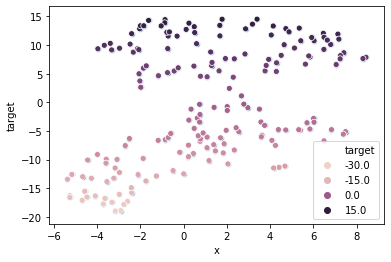

In [22]:
#Make a copy of train dataset
t = train.copy(deep=True)

#Remove non-numerical for t-SNE
non_numerical = ['Scientific Name']

t_sne_df = t.drop(non_numerical, axis = 1).dropna()

#t_SNE
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(t_sne_df)

print(tsne_features[1:4,:])

t_sne_df['x'] = tsne_features[:,0]
t_sne_df['target'] = tsne_features[:,1]

sns.scatterplot(x="x", y="target", data=t_sne_df)

#Hue is Scientific Name
sns.scatterplot(x="x", y="target", hue = 'target', data=t_sne_df)

In [23]:
t_sne_df.head()

,indexId,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,...,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter,y,x,target
2,7,63.090,19.902,2432.0,25.639,117.493,420.0,7.148,25.357,462.0,...,26.975,52.334,31.232,53.0,305.0,26.028,23.993,2,6.007274,-2.822788
3,8,66.983,20.849,2044.0,26.936,112.042,166.0,8.192,25.870,419.0,...,28.357,73.092,33.079,15.0,340.0,27.275,25.442,4,-3.962261,9.351109
4,10,76.739,21.074,2113.0,26.943,63.116,569.0,9.091,27.528,589.0,...,27.757,26.627,32.921,135.0,298.0,27.095,26.139,2,-2.060986,4.986433
6,19,85.890,20.507,2066.0,26.344,51.595,344.0,10.226,25.894,602.0,...,27.047,31.186,32.414,97.0,234.0,26.652,25.780,4,-1.853833,5.967621
8,25,69.519,21.604,2273.0,27.424,108.460,130.0,8.247,26.546,463.0,...,28.896,85.785,33.466,12.0,463.0,27.467,26.060,4,7.486416,-5.115824


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_df = t.drop(['indexId', 'Scientific Name', 'y'], axis = 1).dropna()

std_df = scaler.fit_transform(pca_df)

from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(std_df)
print(pc)

[[ 5.47049451e-01 -1.85535828e-01  2.02663826e+00 ... -5.68875540e-03
  -7.66318047e-03  5.20745517e-05]
 [-1.96230860e+00 -3.37550955e-01  2.53499585e+00 ...  1.14548610e-02
  -2.05712600e-02 -1.90317955e-05]
 [-9.88569490e-01 -3.50809647e-01 -2.50949543e+00 ...  2.07234358e-03
   4.35382094e-03  6.60468637e-05]
 ...
 [ 1.80606093e+00  4.18764393e+00 -4.03824773e-01 ...  2.29622776e-03
   9.07547592e-03  9.05778942e-05]
 [-1.30854635e+00 -1.68931164e+00  1.25719906e+00 ... -1.75027415e-02
   2.30394064e-02 -2.45822251e-04]
 [ 2.12548987e-01 -1.90877022e+00  3.06644084e-01 ... -1.75554654e-02
  -2.42578173e-02 -3.85268631e-04]]


In [73]:
print(pca.explained_variance_ratio_.cumsum())

[0.42110071 0.64615502 0.80284    0.89964534 0.96216573 0.98045861
 0.9862369  0.99119973 0.99387618 0.99605422 0.99770332 0.99900854
 0.99945197 0.99969953 0.99985704 0.99993157 0.99997019 1.
 1.        ]


In [74]:
print(pca.components_)

[[-1.41590866e-01 -3.26812983e-01  1.71143591e-01 -3.20359016e-01
   2.08828992e-01  1.39997609e-01  1.14248334e-01 -2.83052556e-01
   2.41063208e-01  2.14809232e-01  8.95155830e-02  2.24219179e-01
  -2.94878821e-01 -1.31279833e-01 -2.40551008e-01  2.18773117e-01
   7.90404718e-02 -3.12147889e-01 -3.29704610e-01]
 [-1.90342917e-01  1.45854665e-01  3.92914446e-01  1.54257570e-01
   1.08684503e-01  3.45482361e-01 -2.76192284e-01  2.06054237e-01
   8.13559009e-02  1.84165625e-01  4.23579824e-01 -1.40513749e-01
   1.87098829e-01  1.48589340e-01  5.11340069e-02  1.71416485e-01
   4.21503506e-01 -5.27651358e-03  8.90621809e-02]
 [-3.60284357e-01 -9.08727312e-02 -8.11768961e-02 -8.61095910e-02
   3.23721372e-01 -2.26036905e-01 -2.33330433e-01 -1.63476904e-01
  -1.75523442e-01 -3.83955906e-01  1.33156490e-01  5.81486106e-02
   1.12750170e-02  4.55576105e-01 -7.27125490e-02 -3.88731976e-01
   1.28547909e-01 -4.62320934e-02 -1.69693559e-01]
 [-1.38516259e-01 -1.11742197e-01  7.90914971e-02  1.53

## XGBoost

In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [87]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [88]:
xg_reg = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [89]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [90]:
params = {"objective":"reg:linear", 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:18:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
print((cv_results["test-rmse-mean"]).tail(1))

35    1.341284
Name: test-rmse-mean, dtype: float64


In [92]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:18:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
# import matplotlib.pyplot as plt

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

C:\Users\angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


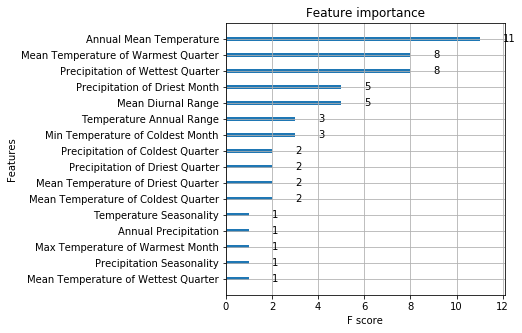

In [94]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix

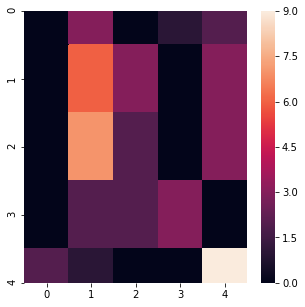

In [96]:
sns.heatmap(confusion_matrix(y_test, preds))

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, labels = [0, 1, 2, 3, 4], target_names = ['Alcedo argentata', 'Anas luzonica', 
                                                                                     'Cacatua haematuropygia', 
                                                                                     'Egretta eulophotes',
                                                                                     'Pithecophaga jeffeyri']))

                        precision    recall  f1-score   support

      Alcedo argentata       0.00      0.00      0.00         6
         Anas luzonica       0.32      0.50      0.39        12
Cacatua haematuropygia       0.29      0.17      0.21        12
    Egretta eulophotes       0.75      0.43      0.55         7
 Pithecophaga jeffeyri       0.53      0.75      0.62        12

             micro avg       0.41      0.41      0.41        49
             macro avg       0.38      0.37      0.35        49
          weighted avg       0.38      0.41      0.38        49



### Dropping highly correlated vars

In [42]:
train_drna = train.dropna()

#Setting X and y
y_drna = train_drna['y']
X_drna = train_drna.drop(['Scientific Name', 'y', 'indexId'], axis = 1)

### Oversampling

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state = RAND)

X_res, y_res = sm.fit_resample(X_drna, y_drna)

# Hold out set of 20%
RAND = 11

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size = 0.2, random_state = RAND)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(random_state=RAND), n_features_to_select=10, verbose=1)
rfe.fit(X_train1, y_train1)

print('RFE features used:')
print(X.columns[rfe.support_])

print('RFE features ranked:')
print(dict(zip(X.columns, rfe.ranking_)))

print('Classification Report:')
print(classification_report(y_test1, rfe.predict(X_test1)))

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RFE features used:
Index(['Annual Mean Temperature', 'Temperature Annual Range',
       'Mean Temperature of Wettest Quarter',
       'Mean Temperature of Driest Quarter',
       'Mean Temperature of Warmest Quarter', 'Annual Precipitation',
       'Precipitation of Driest Month', 'Precipitation Seasonality',
       'Precipitation of Wettest Quarter', 'Precipitation of Warmest Quarter'],
      dtype='object')
RFE features ranked:
{'Annual Mean Temperature': 1, 'Mean Diurnal Range': 5, 'Isothermality': 8, 'Temperature Seasonality': 10, 'Max Temperature of Warmest Month': 9, 'Min Temperature of Coldest Month': 2, 'Temperature Annual Range': 1, 'Mean Temperature of Wettest Quarter': 1, 'Mean Temperature of Driest Quarter': 1, 'Mean Temperature of Warmest Quarter': 1, 'Mean Temperature of Coldest Quarter': 4, 'Annual Precipitation': 1, 'Precipitation of Wettest Month': 3, 'Precipitation of Driest Month': 1, 'Precipitation Seasonality': 1, 'Precipitation of Wettest Quarter': 1, 'Precipitati

In [56]:
# Using features identified in Random Forest Recursive Feature Elimination

# features = ['Annual Mean Temperature', 'Mean Diurnal Range', 'Isothermality',
#             'Temperature Annual Range', 'Mean Temperature of Wettest Quarter',
#             'Annual Precipitation', 'Precipitation of Driest Month',
#             'Precipitation Seasonality', 'Precipitation of Wettest Quarter',
#             'Precipitation of Driest Quarter']

#Setting X and y
y_fe = train_drna['y']
X_fe = train_drna.drop(['y', 'Scientific Name'], axis=1)

# Hold out set of 20%
RAND = 11

X_fe_train, X_fe_test, y_fe_train, y_fe_test = train_test_split(X_fe, y_fe, test_size = 0.2, random_state = RAND, stratify=y_fe)

In [60]:
#XGBoost without null and using RFE
# from sklearn.utils import class_weight
# class_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(train['y']),
#                                              train['y']))

# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val-1]
    
data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg_fe = xgb.XGBClassifier(objective='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                              max_depth = 5, alpha = 10, n_estimators = 10, num_class=5)

xg_reg_fe.fit(X_fe_train,y_fe_train)
#               sample_weight=w_array)

preds_fe = xg_reg_fe.predict(X_fe_test)

In [61]:
# params = {'objective':'multi:softmax', 'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10, 'num_class':5}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="merror", as_pandas=True, seed=123)

In [62]:
# print(cv_results)

In [63]:
print(classification_report(y_fe_test, preds_fe, labels = [0, 1, 2, 3, 4], target_names = ['Alcedo argentata', 'Anas luzonica', 
                                                                                     'Cacatua haematuropygia', 
                                                                                     'Egretta eulophotes',
                                                                                     'Pithecophaga jeffeyri']))

                        precision    recall  f1-score   support

      Alcedo argentata       0.00      0.00      0.00         4
         Anas luzonica       0.00      0.00      0.00         6
Cacatua haematuropygia       0.31      0.40      0.35        10
    Egretta eulophotes       0.67      0.50      0.57         4
 Pithecophaga jeffeyri       0.53      0.64      0.58        14

             micro avg       0.39      0.39      0.39        38
             macro avg       0.30      0.31      0.30        38
          weighted avg       0.35      0.39      0.37        38



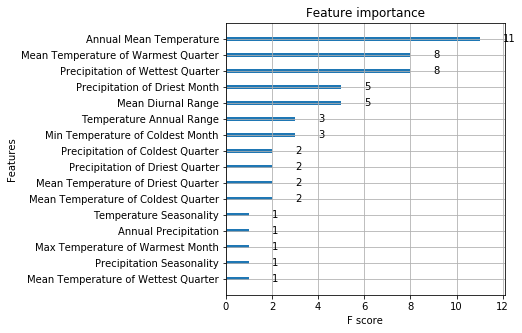

In [59]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [75]:
# from pandas import read_csv
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import LabelEncoder
# import matplotlib
# matplotlib.use('Agg')
# from matplotlib import pyplot

# # load data
# data = pd.read_csv('train.csv')

# # split data into X and y
# X = data.drop('Scientific Name', axis=1)
# y = data['Scientific Name']

# # encode string class values as integers
# label_encoded_y = LabelEncoder().fit_transform(y)

# RAND = 11
# # grid search
# model = XGBClassifier(objective='multi:softmax', random_state=RAND)

# learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
# param_grid = dict(learning_rate=learning_rate)

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RAND)

# grid_search = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=kfold)

# grid_result = grid_search.fit(X, label_encoded_y)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# # plot
# pyplot.errorbar(learning_rate, means, yerr=stds)
# pyplot.title("XGBoost learning_rate vs Log Loss")
# pyplot.xlabel('learning_rate')
# pyplot.ylabel('Log Loss')
# pyplot.savefig('learning_rate.png')

In [76]:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())